In [1]:
model_save_path = "saved_model_cnn1"
cols = ["KOSPI", "KOSPI_START", "KOSPI_HIGH", "KOSPI_LOW", "NASDAQ", "DOW", "CR", "GOLD"]
len_x_ARMA = 60
len_y_nextday = 1
scale_method = "minmax"

In [2]:
from kospi_predict import Crawler

crawler = Crawler(crawl_page_max=30, perPage=100)
# crawler.crawlData(cols, save=True)
crawler.loadFromSavedFile(cols)
df_crawled = crawler.removeNan()
df_crawled = df_crawled.loc[:2000]
df_crawled

,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,NASDAQ,DOW,CR,GOLD
0,2022-03-25,2729.98,2740.83,2740.95,2722.36,14191.839,34707.94,1221.0,1956.45
1,2022-03-24,2729.66,2716.25,2729.66,2705.14,13922.604,34358.50,1223.5,1941.42
2,2022-03-23,2735.05,2727.12,2742.27,2720.83,14108.817,34807.46,1216.5,1926.22
3,2022-03-22,2710.00,2686.68,2712.14,2686.58,13838.460,34552.99,1219.5,1926.25
4,2022-03-21,2686.05,2717.81,2717.81,2683.69,13893.837,34754.93,1215.5,1925.90
...,...,...,...,...,...,...,...,...,...
1996,2014-02-11,1932.06,1924.45,1935.29,1920.55,4148.174,15801.79,1067.0,1285.40
1997,2014-02-10,1923.30,1928.13,1928.39,1916.40,4125.861,15794.08,1072.0,1275.15
1998,2014-02-07,1922.50,1922.45,1923.25,1910.90,4057.122,15628.53,1075.5,1261.80
1999,2014-02-06,1907.89,1897.35,1910.91,1897.35,4011.552,15440.23,1079.0,1259.20


In [3]:
from kospi_predict import DataPreprocessor
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler

dpp = DataPreprocessor(df_crawled, cols, scale_method, model_save_path)
dpp.sortByDate()
dpp.makeDiffByRange(1, len_x_ARMA)
dpp.makeAR(0, len_x_ARMA)
dpp.makeMA(2, len_x_ARMA)
dpp.makeTargetYs(len_y_nextday)
dpp.cutoffData(len_x_ARMA, len_y_nextday)

차분 생성중... (100.00%)

자기상관 생성중... (100.00%)

이동평균 생성중... (100.00%)



In [4]:
# df = dpp.df[500:1500]
# df.reset_index(drop=True, inplace=True)
dpp.df

,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,NASDAQ,DOW,CR,GOLD,X_KOSPI_DIFF1,...,X_GOLD_MA53,X_GOLD_MA54,X_GOLD_MA55,X_GOLD_MA56,X_GOLD_MA57,X_GOLD_MA58,X_GOLD_MA59,X_GOLD_MA60,X_GOLD_MA61,Y_KOSPI_nextday_1
0,2014-05-02,1959.44,1966.29,1968.50,1956.32,4127.451,16558.87,1030.3,1284.25,-2.35,...,1318.838679,1318.663889,1318.097273,1317.537500,1316.973684,1316.252586,1315.329661,1314.394167,1313.453279,1939.88
1,2014-05-07,1939.88,1964.19,1964.19,1939.55,4080.759,16401.02,1023.9,1312.93,-19.56,...,1318.064151,1318.198148,1318.038182,1317.492857,1316.953509,1316.409483,1315.710169,1314.811667,1313.900000,1950.60
2,2014-05-08,1950.60,1945.94,1950.60,1934.72,4067.673,16518.54,1022.1,1292.00,10.72,...,1317.929245,1317.969074,1318.102364,1317.946964,1317.412807,1316.884138,1316.350508,1315.663833,1314.780820,1956.55
3,2014-05-09,1956.55,1953.48,1958.34,1949.64,4051.496,16550.97,1025.5,1289.30,5.95,...,1317.380189,1317.449074,1317.496909,1317.636250,1317.491754,1316.974655,1316.462373,1315.944667,1315.275902,1964.94
4,2014-05-12,1964.94,1956.26,1966.64,1950.91,4071.870,16583.34,1024.7,1291.75,8.39,...,1316.899057,1316.860185,1316.937273,1316.993393,1317.139123,1317.005690,1316.505593,1316.009667,1315.507869,1982.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,2022-03-18,2707.02,2695.64,2708.16,2688.71,13614.781,34480.76,1215.5,1932.95,12.51,...,1861.692264,1860.687222,1859.712000,1858.396250,1857.319474,1856.344138,1855.520508,1854.369333,1852.957213,2686.05
1935,2022-03-21,2686.05,2717.81,2717.81,2683.69,13893.837,34754.93,1215.5,1925.90,-20.97,...,1864.082264,1863.011852,1862.001091,1861.019821,1859.704211,1858.623448,1857.642542,1856.811000,1855.657541,2710.00
1936,2022-03-22,2710.00,2686.68,2712.14,2686.58,13838.460,34552.99,1219.5,1926.25,23.95,...,1866.167170,1865.227037,1864.155273,1863.142143,1862.158070,1860.845517,1859.763729,1858.780167,1857.943607,2735.05
1937,2022-03-23,2735.05,2727.12,2742.27,2720.83,14108.817,34807.46,1216.5,1926.22,25.05,...,1868.486038,1867.279815,1866.336545,1865.264107,1864.249298,1863.263103,1861.954068,1860.871833,1859.886230,2729.66


In [5]:
import cv2
import numpy as np
import pandas as pd

def rescalingByMinMax(arr):
    result = []
    max_val = max(arr)
    min_val = min(arr)
    for val in arr:
        new_val = (val - min_val) / (max_val - min_val)
        result.append(new_val)
    return result

def makeImage3D(df):
    img_list = []
    label_list = []
    date_list = []
    y_list = []
    for item in df.iterrows():
        this_mat = []
        for col in cols:
            this_col_ar_mat = rescalingByMinMax(df.loc[item[0], [x for x in df.columns.to_list() if "{}_AR".format(col) in x]].to_list()) #AR
            this_col_ma_mat = rescalingByMinMax(df.loc[item[0], [x for x in df.columns.to_list() if "{}_MA".format(col) in x]].to_list()) #MA
            this_col_diff_mat = rescalingByMinMax(df.loc[item[0], [x for x in df.columns.to_list() if "{}_DIFF".format(col) in x]].to_list()) #D
            this_row = []
            for idx, _ in enumerate(this_col_ar_mat):
                this_row.append([this_col_ar_mat[idx], this_col_ma_mat[idx], this_col_diff_mat[idx]])
            this_mat.append(this_row)
        this_mat = np.array(this_mat)
        img_list.append(this_mat)

        #라벨 체크
        this_label = np.nan
        if item[0]+1 < len(df): #0 1 2 ... 29 / 30
            this_label = 0
            if df.loc[item[0]+1, "KOSPI"] > df.loc[item[0], "KOSPI"]: #item[0]+1 : 다음날
                this_label = 1
        label_list.append(this_label)

        #라벨값과 함께 이미지로 저장
        cv2.imwrite("data_cnn/{}_{}.png".format(str(this_label), df.loc[item[0], "date"]), this_mat * 255)

        #날짜 리스트 입력
        date_list.append(df.loc[item[0], "date"])

        #y_list 입력
        this_y_list = []
        for y in [x for x in df.columns.to_list() if "Y_" in x]:
            this_y_list.append(df.loc[item[0], y])
        y_list.append(this_y_list)

    img_list = np.array(img_list[:-1])
    label_list = np.array(label_list[:-1], dtype=np.uint8)
    date_list = np.array(date_list[:-1])
    y_list = np.array(y_list[:-1])
    df_result = pd.DataFrame({"date" : date_list, "label" : label_list})

    return img_list, label_list, date_list, y_list, df_result

img_list, label_list, date_list, y_list, df_ref = makeImage3D(dpp.df)
img_list.shape, label_list.shape, date_list.shape, y_list.shape

((1938, 8, 60, 3), (1938,), (1938,), (1938, 1))

In [6]:
df_ref

,date,label
0,2014-05-02,0
1,2014-05-07,1
2,2014-05-08,1
3,2014-05-09,1
4,2014-05-12,1
...,...,...
1933,2022-03-17,1
1934,2022-03-18,0
1935,2022-03-21,1
1936,2022-03-22,1


In [7]:
def makeImage2D(df):
    #행 : X_*_DIFF_AR, X_*_DIFF_MA  *  원천 X 갯수(8개라면 8*2 = 16행)
    #열 : ARMA 갯수. 20이라면 20 = 20열
    col_made_list = [
        "X_*_AR", #8행
        "X_*_DIFF_AR", #8행
        "X_*_MA", #8행
        "X_*_DIFF_MA" #8행
    ]
    img_list = []
    label_list = []
    date_list = []
    y_list = []
    for item in df.iterrows():
        this_mat_list = []
        for col in cols: #8개 ["KOSPI", "KOSPI_START", "KOSPI_HIGH", "KOSPI_LOW", "NASDAQ", "DOW", "CR", "GOLD"]
            for col_made in col_made_list: #4개 ["X_*_AR", "X_*_DIFF_AR", "X_*_MA", "X_*_DIFF_MA"]
                this_col = col_made.replace("*", col) #X_KOSPI_AR
                this_row_list = []
                for i in range(0, len_x_ARMA): #20개. 0~20
                    if "MA" in this_col:
                        i += 2
                    this_col_made = "{}{}".format(this_col, i) #X_KOSPI_AR0
                    this_row_list.append([df.loc[item[0], this_col_made]])
                this_mat_list.append(this_row_list)
        this_mat = np.array(this_mat_list)
        this_mat = this_mat
        img_list.append(this_mat)

        #라벨 체크
        this_label = np.nan
        if item[0]+1 < len(df): #0 1 2 ... 29 / 30
            this_label = 0
            if df.loc[item[0]+1, "KOSPI"] > df.loc[item[0], "KOSPI"]: #item[0]+1 : 다음날
                this_label = 1
        label_list.append(this_label)

        #라벨값과 함께 이미지로 저장
        cv2.imwrite("data_cnn/{}_{}.png".format(str(this_label), df.loc[item[0], "date"]), this_mat * 255)

        #날짜 리스트 입력
        date_list.append(df.loc[item[0], "date"])

        #y_list 입력
        this_y_list = []
        for y in [x for x in df.columns.to_list() if "Y_" in x]:
            this_y_list.append(df.loc[item[0], y])
        y_list.append(this_y_list)

    img_list = np.array(img_list)
    label_list = np.array(label_list)
    date_list = np.array(date_list)
    y_list = np.array(y_list)
    df_result = pd.DataFrame({"date" : date_list, "label" : label_list})

    return img_list, label_list, date_list, y_list, df_result

# img_list, label_list, date_list, y_list, _ = makeImage2D(dpp.df)
# img_list.shape, label_list.shape, date_list.shape, y_list.shape

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list[:-1], label_list[:-1], test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1549, 8, 60, 3), (388, 8, 60, 3), (1549,), (388,))

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(img_list[0].shape[0], img_list[0].shape[1], img_list[0].shape[2])),
  # tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation="softmax")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()
epochs=200
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  batch_size = 32,
  validation_split = 0.2,
  verbose = 1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 60, 16)         448       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 60, 32)         4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 30, 32)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 30, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 15, 64)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 15, 128)        7

<AxesSubplot:>

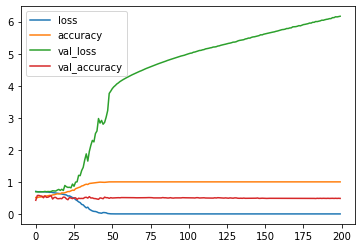

In [10]:
df_history = pd.DataFrame(history.history)
df_history.plot()

In [11]:
preds = model.predict(x_test)
test_results = []
for idx, pred in enumerate(preds):
    this_label = y_test[idx]
    this_predict = np.argmax(pred)
    acc = 0
    if this_label == this_predict:
        acc = 1
    test_results.append({"label" : this_label, "predict" : this_predict, "acc" : acc})

test_results = pd.DataFrame(test_results)
test_results

,label,predict,acc
0,1,0,0
1,1,0,0
2,0,0,1
3,1,1,1
4,0,0,1
...,...,...,...
383,1,1,1
384,1,1,1
385,0,1,0
386,1,1,1


In [12]:
acc_ratio = test_results["acc"].sum() / len(test_results)
print("테스트 정확도 : {}/{} ({:.2f})".format(test_results["acc"].sum(), len(test_results), acc_ratio))

테스트 정확도 : 201/388 (0.52)


최근 날짜로 테스트

In [ ]:
crawler_pred = Crawler(crawl_page_max=1, perPage=100) #이전 추세도 볼겸 넉넉히 수집
crawler_pred.crawlData(cols)
df_crawled_pred = crawler_pred.removeNan()
df_crawled_pred

In [ ]:
#아래는 예측을 위한 전처리
dpp_pred = DataPreprocessor(df_crawled_pred.loc[:100], cols, scale_method, model_save_path)
dpp_pred.sortByDate()
dpp_pred.makeDiffRatio()
dpp_pred.scalingForPredict()
dpp_pred.makeAR(0, len_x_ARMA)
dpp_pred.makeMA(2, len_x_ARMA)
dpp_pred.cutoffData(len_x_ARMA, 0)

In [ ]:
dpp_pred.df

In [ ]:
img_pred_list, label_pred_list, date_list, _ = makeImage2D(dpp_pred.df, cut_latest_data=False)
len(img_pred_list), len(label_pred_list), len(date_list)

In [ ]:
label_pred_list

In [ ]:
before_day = 1
img_pred = np.array([img_pred_list[-before_day]])
pred = model.predict(img_pred)
test_results = []
predict = np.argmax(pred)
print("{} predict : {}, real : {}".format(date_list[-before_day], predict, label_pred_list[-before_day]))

# CNN + 예측

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list, y_list, test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(24, 20, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(20, activation="relu")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

model.summary()
epochs=5000
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  validation_split = 0.1,
  verbose = 1
)